In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


## Exploratory Data Analysis

### 1. Handling NaN values

In [3]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

#### Relationships between NaN Values and Price

In [4]:
car_null_p = df.Price[df.Car.isnull()==1].median()
car_p = df.Price[df.Car.isnull()==0].median()

C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Median Price')

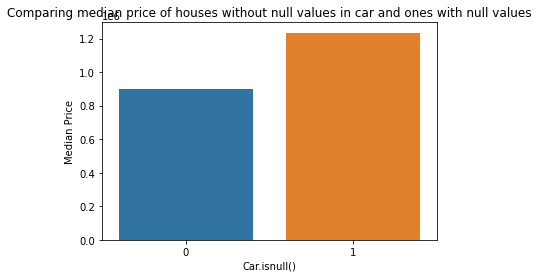

In [5]:
sns.barplot([0,1], [car_p, car_null_p])
plt.title('Comparing median price of houses without null values in car and ones with null values')
plt.xlabel('Car.isnull()')
plt.ylabel('Median Price')

C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Median Price')

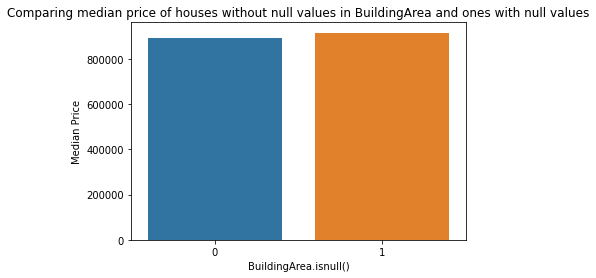

In [6]:
ba_null_p = df.Price[df.BuildingArea.isnull()==1].median()
ba_p = df.Price[df.BuildingArea.isnull()==0].median()
sns.barplot([0,1], [ba_p, ba_null_p])
plt.title('Comparing median price of houses without null values in BuildingArea and ones with null values')
plt.xlabel('BuildingArea.isnull()')
plt.ylabel('Median Price')

In [7]:
sub_ba = df.groupby('Suburb')['BuildingArea'].median().sort_values(ascending = False)

In [8]:
sub_ba.mean()

291.71693069306934

In [9]:
room_ba = df.groupby('Rooms')['BuildingArea'].median().sort_values(ascending = False)
room_ba.mean()

185.75

In [10]:
room_ba

Rooms
7     335.5
6     284.0
5     260.0
4     190.0
8     152.5
3     129.0
2      85.0
1      50.0
10      NaN
Name: BuildingArea, dtype: float64

In [11]:
df[df.Rooms == 10]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11304,Bundoora,5 Ball Ct,10,h,900000.0,PI,Ray,15/07/2017,12.1,3083.0,10.0,3.0,2.0,313.0,NaN,2006.0,Darebin,-37.71098,145.05381,Northern Metropolitan,10175.0


C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Median Price')

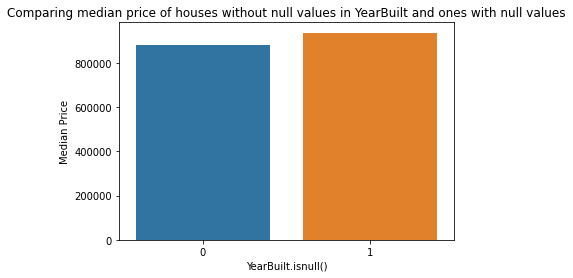

In [12]:
yb_null_p = df.Price[df.YearBuilt.isnull()==1].median()
yb_p = df.Price[df.YearBuilt.isnull()==0].median()
sns.barplot([0,1], [yb_p, yb_null_p])
plt.title('Comparing median price of houses without null values in YearBuilt and ones with null values')
plt.xlabel('YearBuilt.isnull()')
plt.ylabel('Median Price')

C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Median Price')

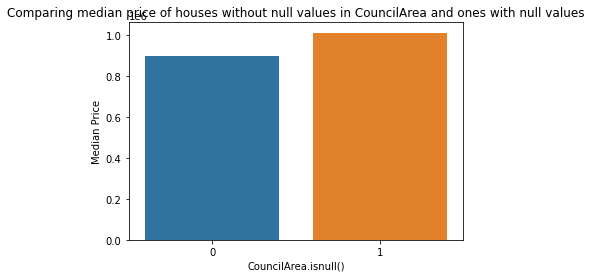

In [13]:
ca_null_p = df.Price[df.CouncilArea.isnull()==1].median()
ca_p = df.Price[df.CouncilArea.isnull()==0].median()
sns.barplot([0,1], [ca_p, ca_null_p])
plt.title('Comparing median price of houses without null values in CouncilArea and ones with null values')
plt.xlabel('CouncilArea.isnull()')
plt.ylabel('Median Price')

In [14]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [15]:
sub_car = df.groupby('Suburb')['Car'].median()

In [16]:
type(sub_car)

pandas.core.series.Series

In [17]:
def l_to_d(l):
        d = {str(l.index[i]) : l[i] for i in range(len(l))}
        return d

In [18]:
sub_car_d = l_to_d(sub_car)

In [19]:
sub_car_d['Abbotsford']

1.0

In [20]:
Car = df.Car

In [21]:
Car

0        1.0
1        0.0
2        0.0
3        1.0
4        2.0
        ... 
13575    2.0
13576    2.0
13577    4.0
13578    5.0
13579    1.0
Name: Car, Length: 13580, dtype: float64

In [22]:
car = []
for j in df.values:
    if str(j[12]) == 'nan':
        j[12] = sub_car_d[f"{str(j[0])}"]
    car.append(j[12])

In [23]:
car

[1.0,
 0.0,
 0.0,
 1.0,
 2.0,
 0.0,
 0.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 6.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 5.0,
 1.0,
 4.0,
 2.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 0.0,
 2.0,
 1.0,
 0.0,
 4.0,
 2.0,
 2.0,
 1.0,
 4.0,
 1.0,
 3.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 0.0,
 1.0,
 2.0,
 2.0,
 0.0,
 3.0,
 1.0,
 3.0,
 2.0,
 2.0,
 4.0,
 6.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 4.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 4.0,
 1.0,
 1.0

In [24]:
df['Car'] = car

In [25]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [26]:
df.BuildingArea

0          NaN
1         79.0
2        150.0
3          NaN
4        142.0
         ...  
13575      NaN
13576    133.0
13577      NaN
13578    157.0
13579    112.0
Name: BuildingArea, Length: 13580, dtype: float64

In [27]:
room_ba = df.groupby('Rooms')['BuildingArea'].sum()

C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rooms', ylabel='BuildingArea'>

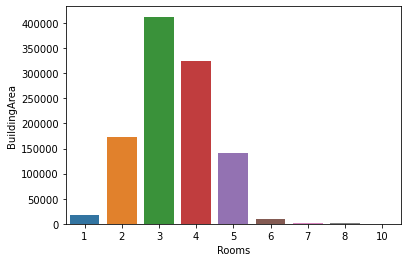

In [28]:
sns.barplot(room_ba.index, room_ba)

In [30]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [39]:
df1 = df[df.Rooms < 10]

In [40]:
room_ba_m = df1.groupby('Rooms')['BuildingArea'].median()
room_ba_m

Rooms
1     50.0
2     85.0
3    129.0
4    190.0
5    260.0
6    284.0
7    335.5
8    152.5
Name: BuildingArea, dtype: float64

In [41]:
df1 = df[df.Rooms < 10].copy()

In [42]:
room_ba_m.index[0]

1

In [43]:
room_ba_m_d = {}
for i in range(len(room_ba_m)):
#     print(room_ba_m[i])
    room_ba_m_d[room_ba_m.index[i]] = room_ba_m[i+1]
room_ba_m_d

{1: 50.0, 2: 85.0, 3: 129.0, 4: 190.0, 5: 260.0, 6: 284.0, 7: 335.5, 8: 152.5}

In [44]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [45]:
ba = []
for j in df1.values:
    if str(j[14]) == 'nan':
        j[14] = room_ba_m_d[j[2]]
    ba.append(j[14])
ba

[85.0,
 79.0,
 150.0,
 129.0,
 142.0,
 85.0,
 210.0,
 107.0,
 50.0,
 75.0,
 85.0,
 190.0,
 94.0,
 85.0,
 50.0,
 97.0,
 110.0,
 105.0,
 129.0,
 73.0,
 135.0,
 129.0,
 27.0,
 60.0,
 135.0,
 85.0,
 50.0,
 174.0,
 50.0,
 128.0,
 190.0,
 18.0,
 124.0,
 50.0,
 91.0,
 128.0,
 82.0,
 81.0,
 225.0,
 145.0,
 145.0,
 84.0,
 134.0,
 116.0,
 86.0,
 129.0,
 127.0,
 186.0,
 90.0,
 73.0,
 94.0,
 133.0,
 105.0,
 130.0,
 85.0,
 260.0,
 133.0,
 113.0,
 85.0,
 129.0,
 100.0,
 174.0,
 129.0,
 309.0,
 192.0,
 126.0,
 129.0,
 101.0,
 102.0,
 113.0,
 129.0,
 76.0,
 129.0,
 129.0,
 190.0,
 129.0,
 190.0,
 146.0,
 82.0,
 85.0,
 198.0,
 133.0,
 81.0,
 85.0,
 85.0,
 180.0,
 129.0,
 159.0,
 107.0,
 129.0,
 122.0,
 85.0,
 181.0,
 260.0,
 129.0,
 85.0,
 85.0,
 129.0,
 98.0,
 83.0,
 147.0,
 129.0,
 146.0,
 254.0,
 85.0,
 123.0,
 131.0,
 34.0,
 207.0,
 85.0,
 129.0,
 129.0,
 129.0,
 145.0,
 85.0,
 68.0,
 129.0,
 134.0,
 129.0,
 54.0,
 263.0,
 129.0,
 129.0,
 203.0,
 165.0,
 60.0,
 140.0,
 85.0,
 129.0,
 129.0,
 85.0,


In [46]:
df1.BuildingArea = ba
df1.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [47]:
sub_yb = df1.groupby('Suburb')['YearBuilt'].median()

In [48]:
sub_yb_d = l_to_d(sub_yb)
sub_yb_d

{'Abbotsford': 1935.0,
 'Aberfeldie': 1980.0,
 'Airport West': 1980.0,
 'Albanvale': 1980.0,
 'Albert Park': 1900.0,
 'Albion': 1962.5,
 'Alphington': 1965.0,
 'Altona': 1982.5,
 'Altona Meadows': 1989.5,
 'Altona North': 1965.0,
 'Ardeer': 1965.0,
 'Armadale': 1960.0,
 'Ascot Vale': 1920.0,
 'Ashburton': 1950.0,
 'Ashwood': 1970.0,
 'Aspendale': 1960.0,
 'Aspendale Gardens': nan,
 'Attwood': nan,
 'Avondale Heights': 1970.0,
 'Bacchus Marsh': nan,
 'Balaclava': 1960.0,
 'Balwyn': 1975.0,
 'Balwyn North': 1960.0,
 'Bayswater': 1972.5,
 'Bayswater North': 1980.0,
 'Beaconsfield': 2005.0,
 'Beaconsfield Upper': 1960.0,
 'Beaumaris': 1980.0,
 'Bellfield': 1957.5,
 'Bentleigh': 1965.0,
 'Bentleigh East': 1970.0,
 'Berwick': 1999.5,
 'Black Rock': 1970.0,
 'Blackburn': 1957.0,
 'Blackburn North': 1965.0,
 'Blackburn South': 1970.0,
 'Bonbeach': 1960.0,
 'Boronia': 1970.0,
 'Box Hill': 1950.0,
 'Braybrook': 1970.0,
 'Briar Hill': 1980.0,
 'Brighton': 1970.0,
 'Brighton East': 1960.0,
 'Broad

In [49]:
YB = []
for j in df1.values:
    if str(j[15]) == 'nan':
        j[15] = sub_yb_d[f"{j[0]}"]
    YB.append(j[15])
YB

[1935.0,
 1900.0,
 1900.0,
 1935.0,
 2014.0,
 1935.0,
 1910.0,
 1890.0,
 1935.0,
 1900.0,
 1935.0,
 2005.0,
 2009.0,
 1935.0,
 1935.0,
 1890.0,
 1880.0,
 1890.0,
 1935.0,
 1985.0,
 1900.0,
 2010.0,
 1935.0,
 1970.0,
 2013.0,
 1900.0,
 1935.0,
 2012.0,
 1935.0,
 1920.0,
 1935.0,
 1935.0,
 1950.0,
 2013.0,
 1900.0,
 1998.0,
 1900.0,
 1930.0,
 2016.0,
 1965.0,
 1965.0,
 1950.0,
 2009.0,
 1980.0,
 2011.0,
 1980.0,
 1980.0,
 1980.0,
 2015.0,
 2013.0,
 2012.0,
 1975.0,
 1950.0,
 1993.0,
 1980.0,
 1980.0,
 2009.0,
 1960.0,
 2003.0,
 1980.0,
 1975.0,
 1950.0,
 1980.0,
 1980.0,
 1980.0,
 1995.0,
 1980.0,
 2010.0,
 1960.0,
 1975.0,
 1980.0,
 1980.0,
 1980.0,
 1980.0,
 1980.0,
 1980.0,
 1980.0,
 1975.0,
 1900.0,
 1900.0,
 1890.0,
 1890.0,
 1900.0,
 1900.0,
 1900.0,
 1880.0,
 1900.0,
 1996.0,
 1900.0,
 1900.0,
 1900.0,
 1900.0,
 1880.0,
 1900.0,
 1900.0,
 2000.0,
 1900.0,
 1900.0,
 1890.0,
 1890.0,
 1900.0,
 1900.0,
 1890.0,
 1910.0,
 1900.0,
 1900.0,
 1890.0,
 1970.0,
 1910.0,
 1900.0,
 1900.0,
 

In [50]:
df1['YearBuilt'] = YB
df1.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt          18
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Median Price')

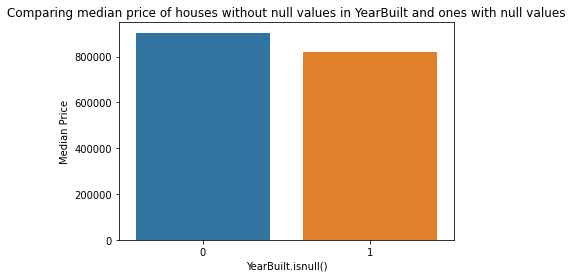

In [51]:
yb_null_p = df1.Price[df1.YearBuilt.isnull()==1].median()
yb_p = df1.Price[df1.YearBuilt.isnull()==0].median()
sns.barplot([0,1], [yb_p, yb_null_p])
plt.title('Comparing median price of houses without null values in YearBuilt and ones with null values')
plt.xlabel('YearBuilt.isnull()')
plt.ylabel('Median Price')

In [52]:
df2 = df1[df1.YearBuilt.isnull() == False]
df2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,190.0,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [53]:
df2.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1364
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [54]:
df3 = df2.drop('CouncilArea', axis = 'columns')
df3

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,190.0,1981.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,Western Metropolitan,6380.0


In [55]:
df3.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [56]:
sub = df3.groupby('Suburb')['Suburb'].count().sort_values(ascending = False)

In [57]:
sub.mean()

44.90397350993378

In [58]:
sub_d = l_to_d(sub)
sub_d

{'Reservoir': 359,
 'Richmond': 260,
 'Bentleigh East': 249,
 'Preston': 239,
 'Brunswick': 222,
 'Essendon': 220,
 'South Yarra': 202,
 'Glen Iris': 195,
 'Hawthorn': 191,
 'Coburg': 190,
 'Northcote': 188,
 'Brighton': 186,
 'Kew': 177,
 'Balwyn North': 171,
 'Pascoe Vale': 171,
 'Yarraville': 164,
 'St Kilda': 162,
 'Glenroy': 159,
 'Port Melbourne': 153,
 'Moonee Ponds': 149,
 'Carnegie': 146,
 'Thornbury': 139,
 'Bentleigh': 139,
 'Brighton East': 138,
 'Newport': 137,
 'Camberwell': 132,
 'Footscray': 132,
 'Elwood': 131,
 'Hampton': 130,
 'Ascot Vale': 130,
 'Surrey Hills': 125,
 'Prahran': 123,
 'Keilor East': 121,
 'Hawthorn East': 119,
 'Malvern East': 117,
 'Kensington': 117,
 'Doncaster': 116,
 'Sunshine': 111,
 'Brunswick West': 110,
 'Balwyn': 107,
 'Williamstown': 107,
 'West Footscray': 105,
 'Fawkner': 102,
 'Toorak': 100,
 'Ivanhoe': 98,
 'Maribyrnong': 96,
 'Armadale': 95,
 'Maidstone': 94,
 'Fitzroy North': 93,
 'Templestowe Lower': 92,
 'Brunswick East': 88,
 'Suns

In [59]:
sub_l = []
for i in df3.values:
    sub_l.append(sub_d[str(i[0])])
sub_l

[56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,


In [60]:
df3['Suburb_n'] = sub_l

In [61]:
df4 = df3[df3.Suburb_n >= 45]
df4

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,Suburb_n
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,-37.79960,144.99840,Northern Metropolitan,4019.0,56
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,Northern Metropolitan,4019.0,56
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,Northern Metropolitan,4019.0,56
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,-37.79690,144.99690,Northern Metropolitan,4019.0,56
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,Northern Metropolitan,4019.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,Western Metropolitan,16166.0,50
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,Western Metropolitan,6380.0,107
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,-37.85274,144.88738,Western Metropolitan,6380.0,107
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,Western Metropolitan,6380.0,107


In [62]:
df4 = df4.drop('Suburb_n', axis = 'columns')
df4

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,Western Metropolitan,16166.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,Western Metropolitan,6380.0


In [63]:
df5 = df4.drop(['Address','Lattitude', 'Longtitude', 'Regionname'], axis = 'columns')
df5

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,Williamstown,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0
13577,Williamstown,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0
13578,Williamstown,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0


In [64]:
df5.Rooms.describe()

count    10742.000000
mean         2.866505
std          0.954245
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          8.000000
Name: Rooms, dtype: float64

In [65]:
room = df5.groupby('Rooms')['Rooms'].count()

C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rooms', ylabel='Rooms'>

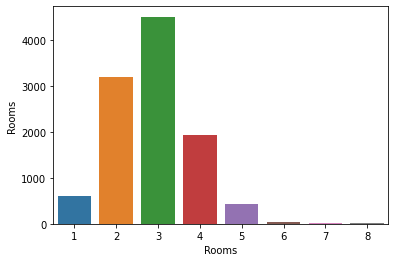

In [66]:
sns.barplot(room.index, room)

In [67]:
df6 = df5[df5.Rooms <= 5]
df6

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,16166.0
13576,Williamstown,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0
13577,Williamstown,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0
13578,Williamstown,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0


In [68]:
df6.groupby('Type')['Type'].count()

Type
h    7153
t     939
u    2592
Name: Type, dtype: int64

In [69]:
df6.groupby('Method')['Method'].count()

Method
PI    1298
S     7032
SA      57
SP    1296
VB    1001
Name: Method, dtype: int64

In [70]:
seller = df6.groupby('SellerG')['SellerG'].count().sort_values(ascending = False)
seller.mean()

49.00917431192661

In [71]:
seller_d = l_to_d(seller)
seller_d

{'Nelson': 1385,
 'Jellis': 1204,
 'hockingstuart': 966,
 'Barry': 684,
 'Marshall': 623,
 'Buxton': 489,
 'Ray': 407,
 'Biggin': 353,
 'Brad': 294,
 'Woodards': 263,
 'Fletchers': 222,
 'Jas': 206,
 'Greg': 203,
 'Sweeney': 185,
 'RT': 168,
 'McGrath': 158,
 'Miles': 142,
 'Noel': 136,
 'Gary': 131,
 'Hodges': 126,
 'Stockdale': 116,
 'Kay': 113,
 'Village': 110,
 'Williams': 96,
 'Love': 89,
 'Douglas': 88,
 'Harcourts': 75,
 'Raine': 73,
 'Chisholm': 70,
 'Rendina': 60,
 'YPA': 55,
 'RW': 45,
 'Collins': 44,
 'Cayzer': 40,
 'Nick': 39,
 'Eview': 38,
 'Burnham': 36,
 'Moonee': 35,
 'Thomson': 34,
 'McDonald': 34,
 'Alexkarbon': 33,
 'Purplebricks': 31,
 'LITTLE': 30,
 'Frank': 29,
 'Peter': 28,
 'Bells': 27,
 'Edward': 27,
 'Considine': 26,
 'Barlow': 26,
 'Haughton': 25,
 'C21': 25,
 'HAR': 23,
 'Walshe': 23,
 'Harrington': 22,
 'Philip': 21,
 "Abercromby's": 20,
 'Dingle': 19,
 'Beller': 19,
 'GL': 19,
 'Wilson': 18,
 "O'Brien": 17,
 'Castran': 17,
 'Lindellas': 17,
 'Buckingham': 

In [72]:
sel_l = []
for i in df6.values:
    sel_l.append(seller_d[f"{i[5]}"])
sel_l

[353,
 353,
 353,
 353,
 1385,
 1204,
 1385,
 1385,
 353,
 353,
 1204,
 1385,
 353,
 353,
 203,
 1204,
 1204,
 30,
 44,
 353,
 113,
 19,
 1204,
 44,
 353,
 623,
 203,
 1385,
 1204,
 1385,
 44,
 353,
 353,
 1385,
 1204,
 1204,
 1385,
 353,
 1385,
 1385,
 1385,
 1385,
 294,
 3,
 684,
 684,
 26,
 684,
 684,
 1385,
 60,
 1385,
 1385,
 684,
 1,
 294,
 684,
 684,
 684,
 684,
 1385,
 34,
 294,
 684,
 60,
 1385,
 1385,
 684,
 684,
 684,
 1385,
 1385,
 294,
 1385,
 1385,
 3,
 75,
 966,
 34,
 489,
 203,
 168,
 623,
 6,
 623,
 623,
 203,
 203,
 40,
 623,
 203,
 40,
 203,
 966,
 203,
 40,
 203,
 203,
 203,
 168,
 203,
 203,
 40,
 203,
 623,
 623,
 623,
 623,
 203,
 966,
 70,
 203,
 203,
 623,
 203,
 966,
 623,
 489,
 623,
 203,
 203,
 966,
 26,
 185,
 203,
 26,
 966,
 203,
 203,
 26,
 966,
 966,
 110,
 26,
 966,
 206,
 966,
 203,
 966,
 966,
 12,
 26,
 185,
 966,
 36,
 26,
 966,
 353,
 966,
 203,
 26,
 966,
 26,
 96,
 26,
 26,
 26,
 966,
 26,
 26,
 185,
 203,
 185,
 2,
 9,
 206,
 206,
 966,
 185,


In [73]:
df6['seller_n'] = sel_l
df6

C:\Users\rohan\AppData\Local\Temp\ipykernel_16612\648759206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['seller_n'] = sel_l


,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,seller_n
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,4019.0,353
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,353
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,353
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,4019.0,353
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,1385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,16166.0,966
13576,Williamstown,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,96
13577,Williamstown,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,73
13578,Williamstown,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,185


In [310]:
pd.DataFrame(seller).describe()

,SellerG
count,218.000000
mean,49.009174
std,162.442645
min,1.000000
25%,1.000000
50%,3.000000
75%,20.750000
max,1385.000000


In [375]:
df7 = df6[df6.seller_n > 49]
df7

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,seller_n
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,4019.0,353
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,353
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,353
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,4019.0,353
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,1385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,16166.0,966
13576,Williamstown,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,96
13577,Williamstown,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,73
13578,Williamstown,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,185


In [376]:
df8 = df7.drop('seller_n',axis = 'columns')

In [377]:
df8.Date = pd.to_datetime(df8.Date)

C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packag

In [378]:
df8['YearSold'] = df8.Date.dt.year

In [379]:
df8

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold
0,Abbotsford,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,4019.0,2016
1,Abbotsford,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,2016
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,2017
3,Abbotsford,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,4019.0,2017
4,Abbotsford,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,4,h,635000.0,S,hockingstuart,2017-08-26,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,16166.0,2017
13576,Williamstown,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017
13577,Williamstown,3,h,1170000.0,S,Raine,2017-08-26,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017
13578,Williamstown,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017


In [380]:
df8['MonthSold'] = df8.Date.dt.month
df8

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold
0,Abbotsford,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,4019.0,2016,3
1,Abbotsford,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,2016,4
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,2017,4
3,Abbotsford,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,4019.0,2017,4
4,Abbotsford,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,4,h,635000.0,S,hockingstuart,2017-08-26,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,16166.0,2017,8
13576,Williamstown,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8
13577,Williamstown,3,h,1170000.0,S,Raine,2017-08-26,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8
13578,Williamstown,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8


In [381]:
df8['DaySold'] = df8.Date.dt.day
df8

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold
0,Abbotsford,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,4019.0,2016,3,12
1,Abbotsford,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,2016,4,2
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,2017,4,3
3,Abbotsford,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,4019.0,2017,4,3
4,Abbotsford,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,2016,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,4,h,635000.0,S,hockingstuart,2017-08-26,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,16166.0,2017,8,26
13576,Williamstown,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26
13577,Williamstown,3,h,1170000.0,S,Raine,2017-08-26,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26
13578,Williamstown,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26


In [382]:
df9 = df8.drop('Date', axis = 'columns')
df9

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,4019.0,2016,3,12
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,2016,4,2
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,2017,4,3
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,4019.0,2017,4,3
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,2016,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,4,h,635000.0,S,hockingstuart,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,16166.0,2017,8,26
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26


In [383]:
dist = df9.Distance
dist

0         2.5
1         2.5
2         2.5
3         2.5
4         2.5
         ... 
13573    14.7
13576     6.8
13577     6.8
13578     6.8
13579     6.3
Name: Distance, Length: 9290, dtype: float64

In [384]:
dist.std()

3.680045589604788

In [385]:
dist_z = []
m = dist.mean()
s = dist.std()
for i in dist:
    z = (i-m)/s
    dist_z.append(z)
dist_z

[-1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 -1.6520422940391573,
 1.3370511104209015,
 1.3370511104209015,
 1.3370511104209015,
 1.3370511104209015,
 1.3370511104209015,
 1.3370511104209015,
 1.3370511104209015,
 1.3370511104209015,
 1.3370511104209015,
 1.3370511104209015,
 1.3370511104209015,
 1.3370511104209015,
 1.3370511104209015,
 

In [386]:
df9['dist_z'] = dist_z
df9

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold,dist_z
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,4019.0,2016,3,12,-1.652042
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,2016,4,2,-1.652042
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,2017,4,3,-1.652042
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,4019.0,2017,4,3,-1.652042
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,2016,4,6,-1.652042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,4,h,635000.0,S,hockingstuart,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,16166.0,2017,8,26,1.663134
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26,-0.483579
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26,-0.483579
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26,-0.483579


In [387]:
df10 = df9[(df9['dist_z'] >= -3) & (df9['dist_z'] <= 3)]

In [388]:
df10 = df10.drop('dist_z', axis = 'columns')
df10

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,4019.0,2016,3,12
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,2016,4,2
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,2017,4,3
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,4019.0,2017,4,3
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,2016,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,4,h,635000.0,S,hockingstuart,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,16166.0,2017,8,26
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26


In [389]:
post = df10.Postcode

In [390]:
post_2 = []
for i in post:
    post_2.append(str(i))
post_2

['3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3067.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3042.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',
 '3206.0',

In [391]:
df10.Postcode = post_2
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9256 entries, 0 to 13579
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         9256 non-null   object 
 1   Rooms          9256 non-null   int64  
 2   Type           9256 non-null   object 
 3   Price          9256 non-null   float64
 4   Method         9256 non-null   object 
 5   SellerG        9256 non-null   object 
 6   Distance       9256 non-null   float64
 7   Postcode       9256 non-null   object 
 8   Bedroom2       9256 non-null   float64
 9   Bathroom       9256 non-null   float64
 10  Car            9256 non-null   float64
 11  Landsize       9256 non-null   float64
 12  BuildingArea   9256 non-null   float64
 13  YearBuilt      9256 non-null   float64
 14  Propertycount  9256 non-null   float64
 15  YearSold       9256 non-null   int64  
 16  MonthSold      9256 non-null   int64  
 17  DaySold        9256 non-null   int64  
dtypes: floa

In [392]:
p = df10.groupby('Postcode')['Postcode'].count().sort_values(ascending = False)
p.mean()

110.19047619047619

In [393]:
p_d = l_to_d(p)
p_d

{'3073.0': 337,
 '3121.0': 239,
 '3165.0': 232,
 '3046.0': 232,
 '3072.0': 223,
 '3058.0': 208,
 '3020.0': 205,
 '3056.0': 202,
 '3163.0': 202,
 '3204.0': 202,
 '3032.0': 190,
 '3040.0': 183,
 '3141.0': 174,
 '3012.0': 174,
 '3122.0': 173,
 '3146.0': 172,
 '3070.0': 171,
 '3011.0': 169,
 '3101.0': 160,
 '3181.0': 159,
 '3013.0': 159,
 '3044.0': 156,
 '3104.0': 155,
 '3186.0': 154,
 '3031.0': 142,
 '3071.0': 134,
 '3042.0': 131,
 '3039.0': 128,
 '3187.0': 128,
 '3015.0': 127,
 '3182.0': 123,
 '3188.0': 121,
 '3081.0': 121,
 '3207.0': 121,
 '3127.0': 117,
 '3184.0': 116,
 '3068.0': 112,
 '3124.0': 112,
 '3033.0': 109,
 '3123.0': 109,
 '3108.0': 102,
 '3084.0': 102,
 '3016.0': 100,
 '3145.0': 100,
 '3103.0': 97,
 '3147.0': 96,
 '3143.0': 94,
 '3079.0': 92,
 '3060.0': 92,
 '3055.0': 91,
 '3107.0': 81,
 '3057.0': 74,
 '3125.0': 72,
 '3142.0': 71,
 '3205.0': 69,
 '3105.0': 67,
 '3144.0': 60,
 '3189.0': 58,
 '3206.0': 58,
 '3051.0': 56,
 '3185.0': 56,
 '3066.0': 55,
 '3065.0': 53,
 '3149.0': 

In [394]:
df10

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,4019.0,2016,3,12
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,2016,4,2
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,2017,4,3
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,4019.0,2017,4,3
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,2016,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,4,h,635000.0,S,hockingstuart,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,16166.0,2017,8,26
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26


In [395]:
p2 = []
for i in df10.values:
     p2.append(p_d[f"{i[7]}"])
p2

[50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 131,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 

In [396]:
df10['Post_n'] = p2
df10

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold,Post_n
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,85.0,1935.0,4019.0,2016,3,12,50
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,2016,4,2,50
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,2017,4,3,50
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,129.0,1935.0,4019.0,2017,4,3,50
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,2016,4,6,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,4,h,635000.0,S,hockingstuart,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,16166.0,2017,8,26,41
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26,100
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26,100
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26,100


In [397]:
pd.DataFrame(p).describe()

,Postcode
count,84.000000
mean,110.190476
std,63.644812
min,22.000000
25%,53.000000
50%,101.000000
75%,156.750000
max,337.000000


In [398]:
df11 = df10[df10.Post_n > 53]
df11

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold,Post_n
38,Airport West,3,t,840000.0,PI,Nelson,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9,131
39,Airport West,3,h,730000.0,VB,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2016,3,12,131
40,Airport West,3,h,770000.0,SP,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2017,4,3,131
41,Airport West,2,h,603000.0,S,Nelson,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3,131
42,Airport West,3,t,700000.0,S,Brad,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Thornbury,3,h,1271000.0,S,Nelson,7.0,3071.0,3.0,1.0,2.0,470.0,151.0,1950.0,8870.0,2017,8,26,134
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26,100
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26,100
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26,100


In [399]:
df11 = df11.drop('Post_n', axis = 'columns')
df11

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold
38,Airport West,3,t,840000.0,PI,Nelson,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9
39,Airport West,3,h,730000.0,VB,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2016,3,12
40,Airport West,3,h,770000.0,SP,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2017,4,3
41,Airport West,2,h,603000.0,S,Nelson,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3
42,Airport West,3,t,700000.0,S,Brad,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Thornbury,3,h,1271000.0,S,Nelson,7.0,3071.0,3.0,1.0,2.0,470.0,151.0,1950.0,8870.0,2017,8,26
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26


In [400]:
df11.Bedroom2.describe()

count    8325.000000
mean        2.819099
std         0.923267
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         9.000000
Name: Bedroom2, dtype: float64

In [401]:
bed_z = []
m = df11.Bedroom2.mean()
s = df11.Bedroom2.std()
for i in df11.Bedroom2:
    z = (i-m)/s
    bed_z.append(z)
bed_z

[0.19593558946807343,
 0.19593558946807343,
 0.19593558946807343,
 -0.8871744917548429,
 0.19593558946807343,
 -0.8871744917548429,
 -0.8871744917548429,
 -0.8871744917548429,
 -0.8871744917548429,
 -0.8871744917548429,
 0.19593558946807343,
 0.19593558946807343,
 0.19593558946807343,
 -0.8871744917548429,
 0.19593558946807343,
 0.19593558946807343,
 -0.8871744917548429,
 0.19593558946807343,
 -0.8871744917548429,
 0.19593558946807343,
 2.3621557519139063,
 0.19593558946807343,
 0.19593558946807343,
 0.19593558946807343,
 -0.8871744917548429,
 0.19593558946807343,
 0.19593558946807343,
 0.19593558946807343,
 -0.8871744917548429,
 0.19593558946807343,
 0.19593558946807343,
 1.2790456706909898,
 0.19593558946807343,
 1.2790456706909898,
 -0.8871744917548429,
 0.19593558946807343,
 0.19593558946807343,
 -0.8871744917548429,
 -1.9702845729777592,
 1.2790456706909898,
 0.19593558946807343,
 0.19593558946807343,
 -0.8871744917548429,
 0.19593558946807343,
 -0.8871744917548429,
 2.36215575191

In [402]:
df11['Bed_z'] = bed_z
df11

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold,Bed_z
38,Airport West,3,t,840000.0,PI,Nelson,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9,0.195936
39,Airport West,3,h,730000.0,VB,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2016,3,12,0.195936
40,Airport West,3,h,770000.0,SP,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2017,4,3,0.195936
41,Airport West,2,h,603000.0,S,Nelson,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3,-0.887174
42,Airport West,3,t,700000.0,S,Brad,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3,0.195936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Thornbury,3,h,1271000.0,S,Nelson,7.0,3071.0,3.0,1.0,2.0,470.0,151.0,1950.0,8870.0,2017,8,26,0.195936
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26,0.195936
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26,0.195936
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26,1.279046


In [403]:
df12 = df11
df12

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold,Bed_z
38,Airport West,3,t,840000.0,PI,Nelson,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9,0.195936
39,Airport West,3,h,730000.0,VB,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2016,3,12,0.195936
40,Airport West,3,h,770000.0,SP,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2017,4,3,0.195936
41,Airport West,2,h,603000.0,S,Nelson,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3,-0.887174
42,Airport West,3,t,700000.0,S,Brad,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3,0.195936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Thornbury,3,h,1271000.0,S,Nelson,7.0,3071.0,3.0,1.0,2.0,470.0,151.0,1950.0,8870.0,2017,8,26,0.195936
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26,0.195936
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26,0.195936
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26,1.279046


In [404]:
df12 = df12.drop('Bed_z', axis = 'columns')

In [405]:
df13 = df12[df12.Rooms >= df12.Bedroom2]
df13

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold
38,Airport West,3,t,840000.0,PI,Nelson,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9
39,Airport West,3,h,730000.0,VB,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2016,3,12
40,Airport West,3,h,770000.0,SP,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2017,4,3
41,Airport West,2,h,603000.0,S,Nelson,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3
42,Airport West,3,t,700000.0,S,Brad,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Thornbury,3,h,1271000.0,S,Nelson,7.0,3071.0,3.0,1.0,2.0,470.0,151.0,1950.0,8870.0,2017,8,26
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26


In [406]:
room_z = []
m = df13.Rooms.mean()
s = df13.Rooms.std()
for i in df13.Rooms:
    z = (i-m)/s
    room_z.append(z)
room_z

[0.15906120614337235,
 0.15906120614337235,
 0.15906120614337235,
 -0.9250734647288303,
 0.15906120614337235,
 -0.9250734647288303,
 0.15906120614337235,
 -0.9250734647288303,
 -0.9250734647288303,
 -0.9250734647288303,
 0.15906120614337235,
 0.15906120614337235,
 0.15906120614337235,
 -0.9250734647288303,
 0.15906120614337235,
 0.15906120614337235,
 -0.9250734647288303,
 0.15906120614337235,
 -0.9250734647288303,
 0.15906120614337235,
 0.15906120614337235,
 0.15906120614337235,
 0.15906120614337235,
 0.15906120614337235,
 0.15906120614337235,
 0.15906120614337235,
 0.15906120614337235,
 -0.9250734647288303,
 0.15906120614337235,
 0.15906120614337235,
 1.243195877015575,
 0.15906120614337235,
 1.243195877015575,
 -0.9250734647288303,
 0.15906120614337235,
 0.15906120614337235,
 -0.9250734647288303,
 -0.9250734647288303,
 1.243195877015575,
 0.15906120614337235,
 0.15906120614337235,
 -0.9250734647288303,
 0.15906120614337235,
 -0.9250734647288303,
 2.3273305478877777,
 0.15906120614337

In [407]:
df13['Room_z'] = room_z
df13

C:\Users\rohan\AppData\Local\Temp\ipykernel_16612\811141427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['Room_z'] = room_z


,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold,Room_z
38,Airport West,3,t,840000.0,PI,Nelson,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9,0.159061
39,Airport West,3,h,730000.0,VB,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2016,3,12,0.159061
40,Airport West,3,h,770000.0,SP,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2017,4,3,0.159061
41,Airport West,2,h,603000.0,S,Nelson,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3,-0.925073
42,Airport West,3,t,700000.0,S,Brad,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3,0.159061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Thornbury,3,h,1271000.0,S,Nelson,7.0,3071.0,3.0,1.0,2.0,470.0,151.0,1950.0,8870.0,2017,8,26,0.159061
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26,0.159061
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26,0.159061
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26,1.243196


In [408]:
df14 = df13[(df13.Room_z <= 3) & (df13.Room_z >= -3)]
df14

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold,Room_z
38,Airport West,3,t,840000.0,PI,Nelson,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9,0.159061
39,Airport West,3,h,730000.0,VB,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2016,3,12,0.159061
40,Airport West,3,h,770000.0,SP,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2017,4,3,0.159061
41,Airport West,2,h,603000.0,S,Nelson,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3,-0.925073
42,Airport West,3,t,700000.0,S,Brad,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3,0.159061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Thornbury,3,h,1271000.0,S,Nelson,7.0,3071.0,3.0,1.0,2.0,470.0,151.0,1950.0,8870.0,2017,8,26,0.159061
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26,0.159061
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26,0.159061
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26,1.243196


In [409]:
df14 = df14.drop('Room_z', axis = 'columns')
df14

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold
38,Airport West,3,t,840000.0,PI,Nelson,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9
39,Airport West,3,h,730000.0,VB,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2016,3,12
40,Airport West,3,h,770000.0,SP,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2017,4,3
41,Airport West,2,h,603000.0,S,Nelson,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3
42,Airport West,3,t,700000.0,S,Brad,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Thornbury,3,h,1271000.0,S,Nelson,7.0,3071.0,3.0,1.0,2.0,470.0,151.0,1950.0,8870.0,2017,8,26
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26


In [410]:
df15 = df14[df14.Bedroom2 >= df14.Bathroom]

In [411]:
df15

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold
38,Airport West,3,t,840000.0,PI,Nelson,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9
39,Airport West,3,h,730000.0,VB,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2016,3,12
40,Airport West,3,h,770000.0,SP,Nelson,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,3464.0,2017,4,3
41,Airport West,2,h,603000.0,S,Nelson,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3
42,Airport West,3,t,700000.0,S,Brad,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Thornbury,3,h,1271000.0,S,Nelson,7.0,3071.0,3.0,1.0,2.0,470.0,151.0,1950.0,8870.0,2017,8,26
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26


In [412]:
df16 = df15[df15.Landsize >= df15.BuildingArea]
df16

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold
38,Airport West,3,t,840000.0,PI,Nelson,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9
41,Airport West,2,h,603000.0,S,Nelson,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3
42,Airport West,3,t,700000.0,S,Brad,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3
44,Airport West,2,u,500000.0,VB,Barry,13.5,3042.0,2.0,1.0,1.0,168.0,86.0,2011.0,3464.0,2017,4,3
45,Airport West,3,h,720000.0,S,Barry,13.5,3042.0,2.0,1.0,1.0,620.0,129.0,1980.0,3464.0,2016,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Thornbury,3,h,1271000.0,S,Nelson,7.0,3071.0,3.0,1.0,2.0,470.0,151.0,1950.0,8870.0,2017,8,26
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26


In [413]:
df17 = df16[df16.YearBuilt <= df16.YearSold]
df17

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold
38,Airport West,3,t,840000.0,PI,Nelson,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9
41,Airport West,2,h,603000.0,S,Nelson,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3
42,Airport West,3,t,700000.0,S,Brad,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3
44,Airport West,2,u,500000.0,VB,Barry,13.5,3042.0,2.0,1.0,1.0,168.0,86.0,2011.0,3464.0,2017,4,3
45,Airport West,3,h,720000.0,S,Barry,13.5,3042.0,2.0,1.0,1.0,620.0,129.0,1980.0,3464.0,2016,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Thornbury,3,h,1271000.0,S,Nelson,7.0,3071.0,3.0,1.0,2.0,470.0,151.0,1950.0,8870.0,2017,8,26
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0,2017,8,26
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,129.0,1997.0,6380.0,2017,8,26
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0,2017,8,26


## Encoding Categorical Variables

In [414]:
li = []
for i in df17.Postcode:
    li.append(float(i))
li

[3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3042.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3206.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3143.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 3032.0,
 

In [415]:
df17.Postcode = li

C:\Users\rohan\AppData\Local\Temp\ipykernel_16612\4230099617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df17.Postcode = li


In [416]:
df18 = pd.get_dummies(df17)

In [417]:
df18

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold,Suburb_Airport West,Suburb_Albert Park,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Brighton,Suburb_Brighton East,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Burwood,Suburb_Camberwell,Suburb_Carnegie,Suburb_Clifton Hill,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Doncaster,Suburb_Elsternwick,Suburb_Elwood,Suburb_Essendon,Suburb_Fawkner,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Glen Iris,Suburb_Glenroy,Suburb_Hadfield,Suburb_Hampton,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Ivanhoe,Suburb_Keilor East,Suburb_Kensington,Suburb_Kew,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Murrumbeena,Suburb_Newport,Suburb_Niddrie,Suburb_North Melbourne,Suburb_Northcote,Suburb_Oak Park,Suburb_Ormond,Suburb_Pascoe Vale,Suburb_Port Melbourne,Suburb_Prahran,Suburb_Preston,Suburb_Reservoir,Suburb_Richmond,Suburb_Rosanna,Suburb_Seddon,Suburb_South Melbourne,Suburb_South Yarra,Suburb_St Kilda,Suburb_Sunshine,Suburb_Sunshine North,Suburb_Sunshine West,Suburb_Surrey Hills,Suburb_Templestowe Lower,Suburb_Thornbury,Suburb_Toorak,Suburb_West Footscray,Suburb_Williamstown,Suburb_Windsor,Suburb_Yarraville,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,SellerG_Barry,SellerG_Biggin,SellerG_Brad,SellerG_Buxton,SellerG_Chisholm,SellerG_Douglas,SellerG_Fletchers,SellerG_Gary,SellerG_Greg,SellerG_Harcourts,SellerG_Hodges,SellerG_Jas,SellerG_Jellis,SellerG_Kay,SellerG_Love,SellerG_Marshall,SellerG_McGrath,SellerG_Miles,SellerG_Nelson,SellerG_Noel,SellerG_RT,SellerG_Raine,SellerG_Ray,SellerG_Rendina,SellerG_Stockdale,SellerG_Sweeney,SellerG_Village,SellerG_Williams,SellerG_Woodards,SellerG_YPA,SellerG_hockingstuart
38,3,840000.0,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
41,2,603000.0,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
42,3,700000.0,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,2,500000.0,13.5,3042.0,2.0,1.0,1.0,168.0,86.0,2011.0,3464.0,2017,4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,3,720000.0,13.5,3042.0,2.0,1.0,1.0,620.0,129.0,1980.0,3464.0,2016,6,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [418]:
l = ['Suburb_Airport West','Type_h', 'Method_PI', 'SellerG_Barry']

In [419]:
df18 = df18.drop(l, axis = 'columns')
df18

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold,Suburb_Albert Park,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Brighton,Suburb_Brighton East,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Burwood,Suburb_Camberwell,Suburb_Carnegie,Suburb_Clifton Hill,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Doncaster,Suburb_Elsternwick,Suburb_Elwood,Suburb_Essendon,Suburb_Fawkner,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Glen Iris,Suburb_Glenroy,Suburb_Hadfield,Suburb_Hampton,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Ivanhoe,Suburb_Keilor East,Suburb_Kensington,Suburb_Kew,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Murrumbeena,Suburb_Newport,Suburb_Niddrie,Suburb_North Melbourne,Suburb_Northcote,Suburb_Oak Park,Suburb_Ormond,Suburb_Pascoe Vale,Suburb_Port Melbourne,Suburb_Prahran,Suburb_Preston,Suburb_Reservoir,Suburb_Richmond,Suburb_Rosanna,Suburb_Seddon,Suburb_South Melbourne,Suburb_South Yarra,Suburb_St Kilda,Suburb_Sunshine,Suburb_Sunshine North,Suburb_Sunshine West,Suburb_Surrey Hills,Suburb_Templestowe Lower,Suburb_Thornbury,Suburb_Toorak,Suburb_West Footscray,Suburb_Williamstown,Suburb_Windsor,Suburb_Yarraville,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,SellerG_Biggin,SellerG_Brad,SellerG_Buxton,SellerG_Chisholm,SellerG_Douglas,SellerG_Fletchers,SellerG_Gary,SellerG_Greg,SellerG_Harcourts,SellerG_Hodges,SellerG_Jas,SellerG_Jellis,SellerG_Kay,SellerG_Love,SellerG_Marshall,SellerG_McGrath,SellerG_Miles,SellerG_Nelson,SellerG_Noel,SellerG_RT,SellerG_Raine,SellerG_Ray,SellerG_Rendina,SellerG_Stockdale,SellerG_Sweeney,SellerG_Village,SellerG_Williams,SellerG_Woodards,SellerG_YPA,SellerG_hockingstuart
38,3,840000.0,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
41,2,603000.0,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
42,3,700000.0,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,2,500000.0,13.5,3042.0,2.0,1.0,1.0,168.0,86.0,2011.0,3464.0,2017,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,3,720000.0,13.5,3042.0,2.0,1.0,1.0,620.0,129.0,1980.0,3464.0,2016,6,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [420]:
x = df18.drop('Price', axis = 'columns')
y = df18.Price

In [421]:
x

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,YearSold,MonthSold,DaySold,Suburb_Albert Park,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Brighton,Suburb_Brighton East,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulleen,Suburb_Burwood,Suburb_Camberwell,Suburb_Carnegie,Suburb_Clifton Hill,Suburb_Coburg,Suburb_Coburg North,Suburb_Collingwood,Suburb_Doncaster,Suburb_Elsternwick,Suburb_Elwood,Suburb_Essendon,Suburb_Fawkner,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Glen Iris,Suburb_Glenroy,Suburb_Hadfield,Suburb_Hampton,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Ivanhoe,Suburb_Keilor East,Suburb_Kensington,Suburb_Kew,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_Moonee Ponds,Suburb_Moorabbin,Suburb_Murrumbeena,Suburb_Newport,Suburb_Niddrie,Suburb_North Melbourne,Suburb_Northcote,Suburb_Oak Park,Suburb_Ormond,Suburb_Pascoe Vale,Suburb_Port Melbourne,Suburb_Prahran,Suburb_Preston,Suburb_Reservoir,Suburb_Richmond,Suburb_Rosanna,Suburb_Seddon,Suburb_South Melbourne,Suburb_South Yarra,Suburb_St Kilda,Suburb_Sunshine,Suburb_Sunshine North,Suburb_Sunshine West,Suburb_Surrey Hills,Suburb_Templestowe Lower,Suburb_Thornbury,Suburb_Toorak,Suburb_West Footscray,Suburb_Williamstown,Suburb_Windsor,Suburb_Yarraville,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,SellerG_Biggin,SellerG_Brad,SellerG_Buxton,SellerG_Chisholm,SellerG_Douglas,SellerG_Fletchers,SellerG_Gary,SellerG_Greg,SellerG_Harcourts,SellerG_Hodges,SellerG_Jas,SellerG_Jellis,SellerG_Kay,SellerG_Love,SellerG_Marshall,SellerG_McGrath,SellerG_Miles,SellerG_Nelson,SellerG_Noel,SellerG_RT,SellerG_Raine,SellerG_Ray,SellerG_Rendina,SellerG_Stockdale,SellerG_Sweeney,SellerG_Village,SellerG_Williams,SellerG_Woodards,SellerG_YPA,SellerG_hockingstuart
38,3,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464.0,2016,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
41,2,13.5,3042.0,2.0,1.0,1.0,272.0,84.0,1950.0,3464.0,2017,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
42,3,13.5,3042.0,3.0,2.0,2.0,239.0,134.0,2009.0,3464.0,2017,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,2,13.5,3042.0,2.0,1.0,1.0,168.0,86.0,2011.0,3464.0,2017,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,3,13.5,3042.0,2.0,1.0,1.0,620.0,129.0,1980.0,3464.0,2016,6,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,3,7.0,3071.0

In [422]:
y

38        840000.0
41        603000.0
42        700000.0
44        500000.0
45        720000.0
           ...    
13563    1271000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 6562, dtype: float64

## Train Test Split

In [423]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [424]:
len(x_train)

5249

In [425]:
len(x_test)

1313

## Linear Regression

In [426]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [427]:
lr.fit(x_train, y_train)

LinearRegression()

In [428]:
lr.score(x_test, y_test)

0.7355769475865483

In [429]:
lr.score(x_train, y_train)

0.7218369412802532

## Cross val Score

In [430]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(LinearRegression(), x, y, cv = 5)

In [431]:
score.mean()

0.6961137309122647

## Lasso and ride regression, and hyper parameter tuning

In [432]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [433]:
model = {
    'ridge':{
        'model': Ridge(),
        'params':{
            'alpha':[2,5,10,20,30,40,50,60,70,80,90,100]
        }
    },
    'lasso':{
        'model': Lasso(),
        'params':{
            'alpha':[2,5,10,20,30,40,50,60,70,80,90,100]
        }
    }   
    }

In [434]:
m = []
for mdl, md in model.items():
    gs = GridSearchCV(md['model'], md['params'], cv = 5, return_train_score = False)
    gs.fit(x,y)
    
    ml = {
        'name':mdl,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    }
    m.append(ml)
pd.DataFrame(m, columns = ['name', 'best_score', 'best_params'])

C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.165e+14, tolerance: 2.321e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.039e+14, tolerance: 2.223e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.036e+14, tolerance: 2.266e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.182e+14, tolerance: 2.321e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

,name,best_score,best_params
0,ridge,0.696348,{'alpha': 2}
1,lasso,0.696283,{'alpha': 20}


In [435]:
lr.score(x_test, y_test)

0.7355769475865483

In [437]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

348571.3533192839